# Import

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Default font size
plt.rcParams['font.size'] = 6

**Matplotlib Named Color**

https://matplotlib.org/stable/gallery/color/named_colors.html

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [85]:
df_alg = pd.read_csv('../datasets/algeria_2012_forest_fires.csv')
df_por = pd.read_csv('../datasets/portugal_2007_forest_fires.csv')
df_sst_2007 = pd.read_csv('../datasets/sst_daily_2007.csv')
df_sst_2012 = pd.read_csv('../datasets/sst_daily_2012.csv')

# Merge 2012 Algeria with 2012 Nino34 SST

In [86]:
df_alg.sample(10)

day  month  year          region area  Temperature  RH  Ws  Rain   FFMC  \
60    31      7  2012          Bejaia   ne           35  64  17    0.0  87.2   
127    6      6  2012  Sidi-Bel Abbes   nw           35  54  11    0.1  83.7   
136   15      6  2012  Sidi-Bel Abbes   nw           28  90  15    0.0  66.8   
72    12      8  2012          Bejaia   ne           35  51  13    0.3  81.3   
242   29      9  2012  Sidi-Bel Abbes   nw           24  54  18    0.1  79.7   
140   19      6  2012  Sidi-Bel Abbes   nw           32  67  14    4.5  64.6   
236   23      9  2012  Sidi-Bel Abbes   nw           35  56  14    0.0  89.0   
213   31      8  2012  Sidi-Bel Abbes   nw           30  59  19    0.0  89.1   
210   28      8  2012  Sidi-Bel Abbes   nw           35  56  14    0.4  79.2   
128    7      6  2012  Sidi-Bel Abbes   nw           35  44  17    0.2  85.6   

      DMC     DC  ISI   BUI   FWI      Classes  
60   31.9  145.7  6.8  41.2  15.7      fire     
127   8.4   26.3  3.1   9.3   3.1      fire     
136   7.2   14.7  1.2   7.1   0.6  not fire     
72   15.6   75.1  2.5  20.7   4.2  not fire     
242   4.3   15.2  1.7   5.1   0.7  not fire     
140   4.4    8.2  1.0   4.2   0.4  not fire     
236  29.4  115.6  7.5  36.0  15.2      fire     
213  27.8  168.2  9.8  39.3  19.4      fire     
210  37.0  166.0  2.1  30.6   6.1  not fire     
128   9.9   28.9  5.4  10.7   6.0      fire

In [87]:
df_alg.isna().sum()

day            0
month          0
year           0
region         0
area           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [88]:
# Remove padding and trailing spaces from Classes
df_alg['Classes'] = df_alg['Classes'].str.strip()

# Replace fire and not fires in Classes with 1 and 0
df_alg['Classes'] = df_alg['Classes'].replace(['not fire', 'fire'], [0, 1])

df_alg['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [ ]:
# Create timestamp column from day, month and year
df_alg['timestamp'] = pd.to_datetime(df_alg[['day', 'month', 'year']])
df_alg.drop(['day', 'month', 'year'], axis=1, inplace=True)

# Set as index
df_alg.set_index('timestamp', inplace=True)

# Drop region and area columns
df_alg.drop(['region', 'area'], axis=1, inplace=True)

In [90]:
# El Nino 3.4 Index
df_sst_2012.head()

# Parse timestamp from date
df_sst_2012['timestamp'] = pd.to_datetime(df_sst_2012['date'])
df_sst_2012.drop('date', axis=1, inplace=True)
df_sst_2012.set_index('timestamp', inplace=True)

# Add nino34_sst column to df_alg
df_alg['nino34_sst'] = df_sst_2012['nino34_sst']

In [ ]:
# Rename columns
# df_alg.columns = ['temp', 'humidity', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'fire', 'nino34_sst']
df_alg.columns = ['temp', 'humidity', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'fire', 'nino34_sst']

# Reorder columns
df_alg = df_alg[['temp', 'humidity', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'nino34_sst', 'fire']]

# Final Algeria dataset
df_alg.sample(10)

region area  temp  humidity  wind  rain  FFMC   DMC  \
timestamp                                                                 
2012-08-19          Bejaia   ne    35        62    19   0.0  89.4  23.2   
2012-06-03  Sidi-Bel Abbes   nw    29        80    14   2.0  48.7   2.2   
2012-08-23          Bejaia   ne    36        53    16   0.0  89.5  37.6   
2012-09-09  Sidi-Bel Abbes   nw    30        80    15   0.0  83.1   7.9   
2012-09-02          Bejaia   ne    22        86    15  10.1  30.5   0.7   
2012-09-19          Bejaia   ne    29        57    14   0.0  89.3  12.5   
2012-09-20  Sidi-Bel Abbes   nw    34        58    13   0.2  79.5  18.7   
2012-08-16  Sidi-Bel Abbes   nw    40        41    10   0.1  92.0  22.6   
2012-06-05          Bejaia   ne    27        77    16   0.0  64.8   3.0   
2012-07-18  Sidi-Bel Abbes   nw    33        68    15   0.0  86.1  23.9   

               DC   ISI   BUI   FWI  nino34_sst  fire  
timestamp                                              
2012-08-19  120.9   9.7  31.3  17.2        27.3     1  
2012-06-03    7.6   0.3   2.6   0.1        27.7     0  
2012-08-23  161.5  10.4  47.5  22.3        27.3     1  
2012-09-09   34.5   3.5  10.0   3.7        27.8     1  
2012-09-02    7.0   0.0   1.1   0.0        28.1     0  
2012-09-19   41.3   7.8  14.2   9.7        26.7     1  
2012-09-20   88.0   2.1  24.4   3.8        26.7     0  
2012-08-16   65.1   9.5  24.2  14.8        27.3     1  
2012-06-05   14.2   1.2   3.9   0.5        27.7     0  
2012-07-18   51.6   5.2  23.9   9.1        27.4     1

# Merge 2007 Portugal with 2007 Nino34 SST

In [92]:
df_por.sample(10)

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00
332  4  4   sep  sat  91.2  124.4  795.3   8.5  17.1  41   2.2   0.0  11.22
73   5  4   aug  tue  88.8  147.3  614.5   9.0  17.3  43   4.5   0.0   0.00
367  4  5   sep  tue  91.1  132.3  812.1  12.5  16.4  27   3.6   0.0   0.00
260  2  4   aug  mon  93.6   97.9  542.0  14.4  28.3  32   4.0   0.0   8.85
208  6  5   sep  fri  92.4  117.9  668.0  12.2  19.6  33   6.3   0.0  19.23
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0   0.77
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00
35   6  3   sep  tue  90.3   80.7  730.2   6.3  18.2  62   4.5   0.0   0.00
434  1  4   aug  fri  90.6  269.8  811.2   5.5  22.2  45   3.6   0.0   0.00

In [93]:
df_por['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
# Add Classes column with value 1
df_por['fire'] = 1

# Drop X, Y and area columns
df_por.drop(['X', 'Y', 'area'], axis=1, inplace=True)

# Set day = 1
df_por['day'] = 1

# Add year column with value 2007
df_por['year'] = 2007

# Create timestamp column from day, month and year
# Parse month from mmm to mm
df_por['month'] = pd.to_datetime(df_por['month'], format='%b').dt.month
df_por['timestamp'] = pd.to_datetime(df_por[['day', 'month', 'year']])

# Drop day, month and year columns
df_por.drop(['day', 'month', 'year'], axis=1, inplace=True)

# Set as index
df_por.set_index('timestamp', inplace=True)

df_por.sample(10)

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  fire
timestamp                                                                    
2007-03-01  2  2  89.3   51.3  102.2   9.6  11.5  39   5.8   0.0   0.00     1
2007-08-01  2  4  92.1  111.2  654.1   9.6  20.5  35   4.0   0.0   1.64     1
2007-08-01  4  3  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00     1
2007-07-01  9  9  93.2  114.4  560.0   9.5  30.2  25   4.5   0.0   2.75     1
2007-06-01  3  6  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00     1
2007-12-01  3  4  85.4   25.4  349.7   2.6   4.6  21   8.5   0.0  10.73     1
2007-08-01  8  6  92.3   85.3  488.0  14.7  20.8  32   6.3   0.0   0.00     1
2007-08-01  1  4  90.6  269.8  811.2   5.5  22.2  45   3.6   0.0   0.00     1
2007-08-01  3  4  91.6  248.4  753.8   6.3  16.8  56   3.1   0.0   0.00     1
2007-09-01  6  3  92.8  119.0  783.5   7.5  18.9  34   7.2   0.0  34.36     1

In [95]:
df_sst_2007.sample(10)

date  nino12_sst  nino12_ssta  nino3_sst  nino3_ssta  nino34_sst  \
179  2007-06-29        21.9          0.7       25.8         0.5        27.3   
295  2007-10-23        19.3          1.7       23.8         1.2        25.5   
126  2007-05-07        24.1          0.9       26.5         0.9        27.3   
210  2007-07-30        20.9          0.6       24.8         0.7        26.8   
5    2007-01-06        24.6          0.8       26.5         1.1        27.5   
287  2007-10-15        19.3          1.6       23.6         1.4        25.3   
254  2007-09-12        19.5          1.2       24.1         0.8        25.9   
340  2007-12-07        20.6          1.8       23.9         1.2        25.4   
306  2007-11-03        19.5          1.8       23.6         1.5        25.5   
253  2007-09-11        20.3          0.4       24.0         0.9        25.9   

     nino34_ssta  nino4_sst  nino4_ssta  
179          0.2       28.5         0.3  
295          1.2       28.1         0.5  
126          0.6       28.4         0.2  
210          0.4       28.6         0.1  
5            1.0       29.2         0.9  
287          1.4       27.9         0.7  
254          0.7       28.1         0.5  
340          1.2       27.6         1.0  
306          1.2       27.9         0.8  
253          0.7       28.3         0.3

In [ ]:
# Parse timestamp from date
df_sst_2007['timestamp'] = pd.to_datetime(df_sst_2007['date'])

# Add month column
df_sst_2007['month'] = df_sst_2007['timestamp'].dt.month

# Calculate average nino34_sst for each month
nino34_sst_monthly = df_sst_2007.groupby('month')['nino34_sst'].mean()

# Add nino34_sst column to df_por
df_por['nino34_sst'] = df_por.index.month.map(nino34_sst_monthly)

# Reorder columns
df_por = df_por[['temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'nino34_sst', 'fire']]

# Rename columns
df_por.columns = ['temp', 'humidity', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'nino34_sst', 'fire']

df_por.head()

X  Y  temp  humidity  wind  rain  FFMC   DMC     DC  ISI  \
timestamp                                                              
2007-03-01  7  5   8.2        51   6.7   0.0  86.2  26.2   94.3  5.1   
2007-10-01  7  4  18.0        33   0.9   0.0  90.6  35.4  669.1  6.7   
2007-10-01  7  4  14.6        33   1.3   0.0  90.6  43.7  686.9  6.7   
2007-03-01  8  6   8.3        97   4.0   0.2  91.7  33.3   77.5  9.0   
2007-03-01  8  6  11.4        99   1.8   0.0  89.3  51.3  102.2  9.6   

            nino34_sst  fire  
timestamp                     
2007-03-01   27.012903     1  
2007-10-01   25.432258     1  
2007-10-01   25.432258     1  
2007-03-01   27.012903     1  
2007-03-01   27.012903     1

# Merge 2012 Algeria and 2007 Portugal

In [97]:
# Drop BUI and FWI columns from df_alg since they are not present in df_por
df_alg.drop(['BUI', 'FWI'], axis=1, inplace=True)

# Concatenate df_alg and df_por
df_merged = pd.concat([df_alg, df_por], axis=0, join='outer')

# Final Datasets

In [98]:
df_merged.sample(10)

region area  temp  humidity  wind  rain  FFMC    DMC     DC   ISI  \
timestamp                                                                       
2007-09-01     NaN  NaN  23.9        32   6.7   0.0  92.4  124.1  680.7   8.5   
2007-07-01     NaN  NaN  24.8        29   2.2   0.0  90.1   68.6  355.2   7.2   
2012-06-10  Bejaia   ne  28.0        79  12.0   0.0  73.2    9.5   46.3   1.3   
2007-07-01     NaN  NaN  18.2        82   4.5   0.0  93.7  101.3  423.4  14.7   
2007-09-01     NaN  NaN  24.3        25   4.0   0.0  92.9  133.3  699.6   9.2   
2007-09-01     NaN  NaN  10.5        77   4.0   0.0  89.7  284.9  844.0  10.1   
2012-07-20  Bejaia   ne  33.0        65  15.0   0.1  81.4   12.3   62.1   2.8   
2007-08-01     NaN  NaN  26.4        33   3.6   0.0  93.7  231.1  715.1   8.4   
2012-06-14  Bejaia   ne  30.0        78  20.0   0.5  59.0    4.6    7.8   1.0   
2007-09-01     NaN  NaN  17.6        46   3.1   0.0  91.0  129.5  692.6   7.0   

            nino34_sst  fire    X    Y  
timestamp                               
2007-09-01   25.846667     1  1.0  3.0  
2007-07-01   26.916129     1  9.0  9.0  
2012-06-10   27.700000     0  NaN  NaN  
2007-07-01   26.916129     1  7.0  4.0  
2007-09-01   25.846667     1  4.0  5.0  
2007-09-01   25.846667     1  7.0  4.0  
2012-07-20   27.400000     1  NaN  NaN  
2007-08-01   26.270968     1  7.0  5.0  
2012-06-14   28.000000     0  NaN  NaN  
2007-09-01   25.846667     1  2.0  5.0

In [99]:
df_merged.describe()    

temp    humidity        wind        rain        FFMC         DMC  \
count  761.000000  761.000000  761.000000  761.000000  761.000000  761.000000   
mean    23.148095   49.947438    7.700526    0.258607   86.554402   80.027989   
std      8.099219   17.876252    5.786381    1.206968   11.041353   69.659117   
min      2.200000   15.000000    0.400000    0.000000   18.700000    0.700000   
25%     17.600000   35.000000    3.100000    0.000000   85.400000   16.500000   
50%     22.400000   47.000000    4.900000    0.000000   90.700000   73.400000   
75%     30.000000   64.000000   14.000000    0.000000   92.300000  126.500000   
max     42.000000  100.000000   29.000000   16.800000   96.200000  291.300000   

               DC         ISI  nino34_sst        fire           X           Y  
count  761.000000  761.000000  761.000000  761.000000  517.000000  517.000000  
mean   388.056899    7.655191   26.702638    0.860710    4.669246    4.299807  
std    311.030549    4.857480    0.768163    0.346477    2.313778    1.229900  
min      6.900000    0.000000   25.350000    0.000000    1.000000    2.000000  
25%     50.200000    4.100000   25.846667    1.000000    3.000000    4.000000  
50%    466.600000    7.500000   26.270968    1.000000    4.000000    4.000000  
75%    690.000000    9.800000   27.374194    1.000000    7.000000    5.000000  
max    860.600000   56.100000   28.200000    1.000000    9.000000    9.000000

In [ ]:
# Save to CSV
# df_merged.to_csv('../datasets/forest_fires_merged_for_modeling.csv')
df_merged.to_csv('../datasets/forest_fires_merged_with_coords.csv')

# EDA

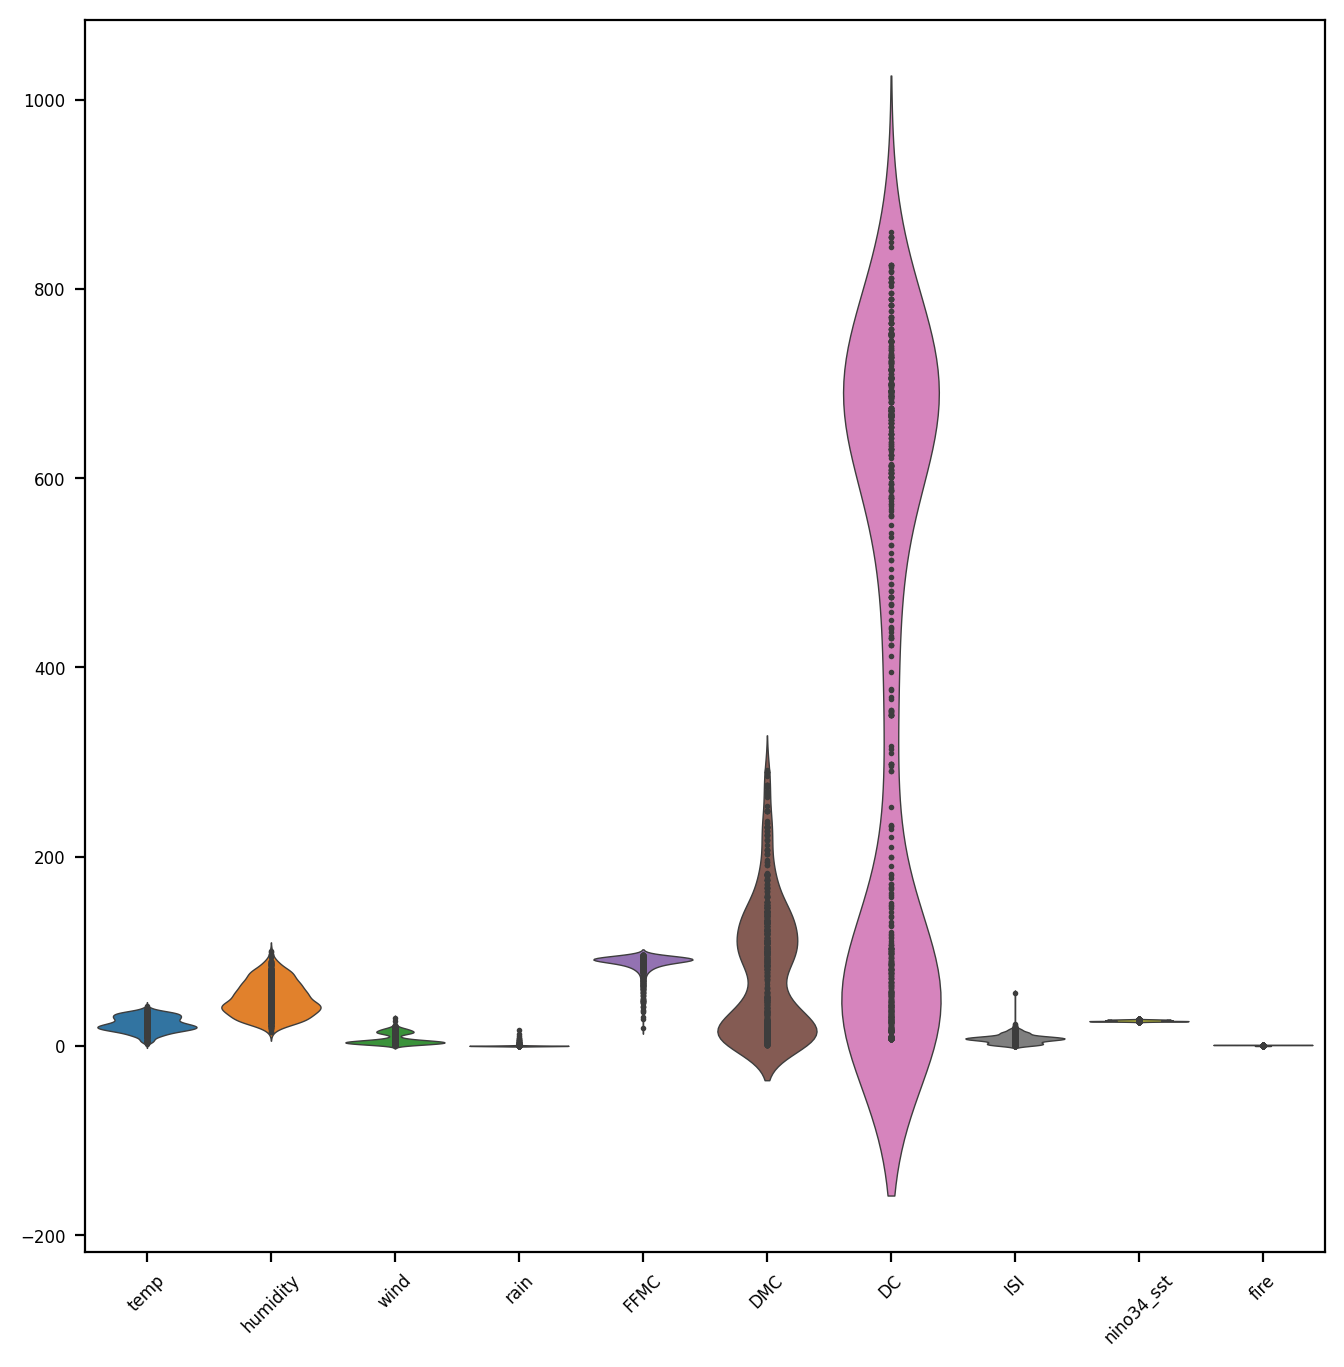

In [129]:
# Violin plot
plt.figure(figsize=(8, 8))
sns.violinplot(data=df_merged, inner='point', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

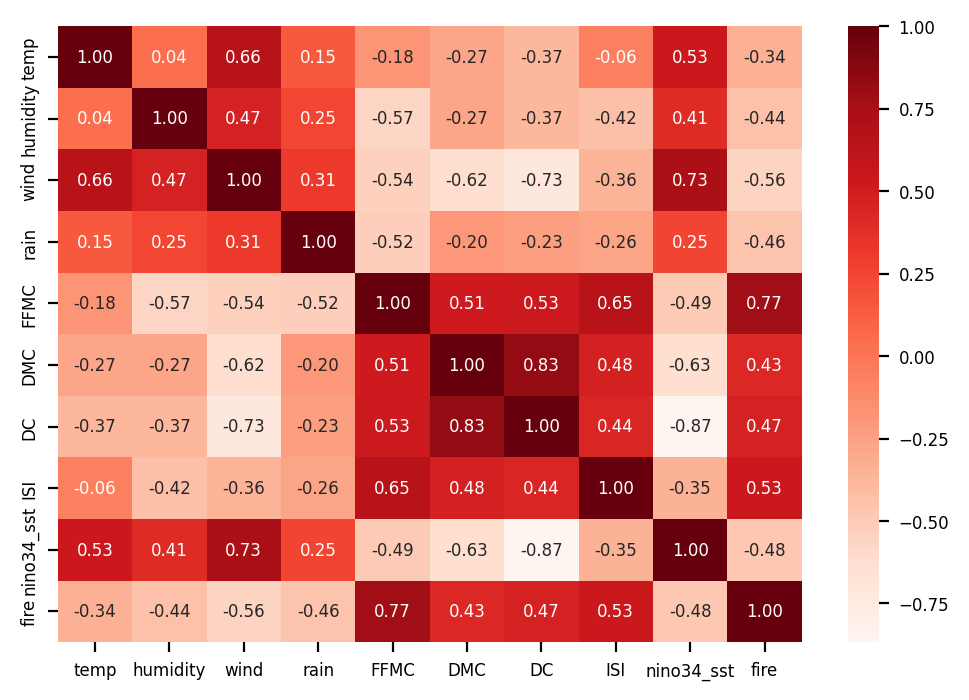

In [128]:
# Correlation matrix
corr = df_merged.corr()
sns.heatmap(data=corr, cmap='Reds', annot=True, fmt='.2f')
plt.show()

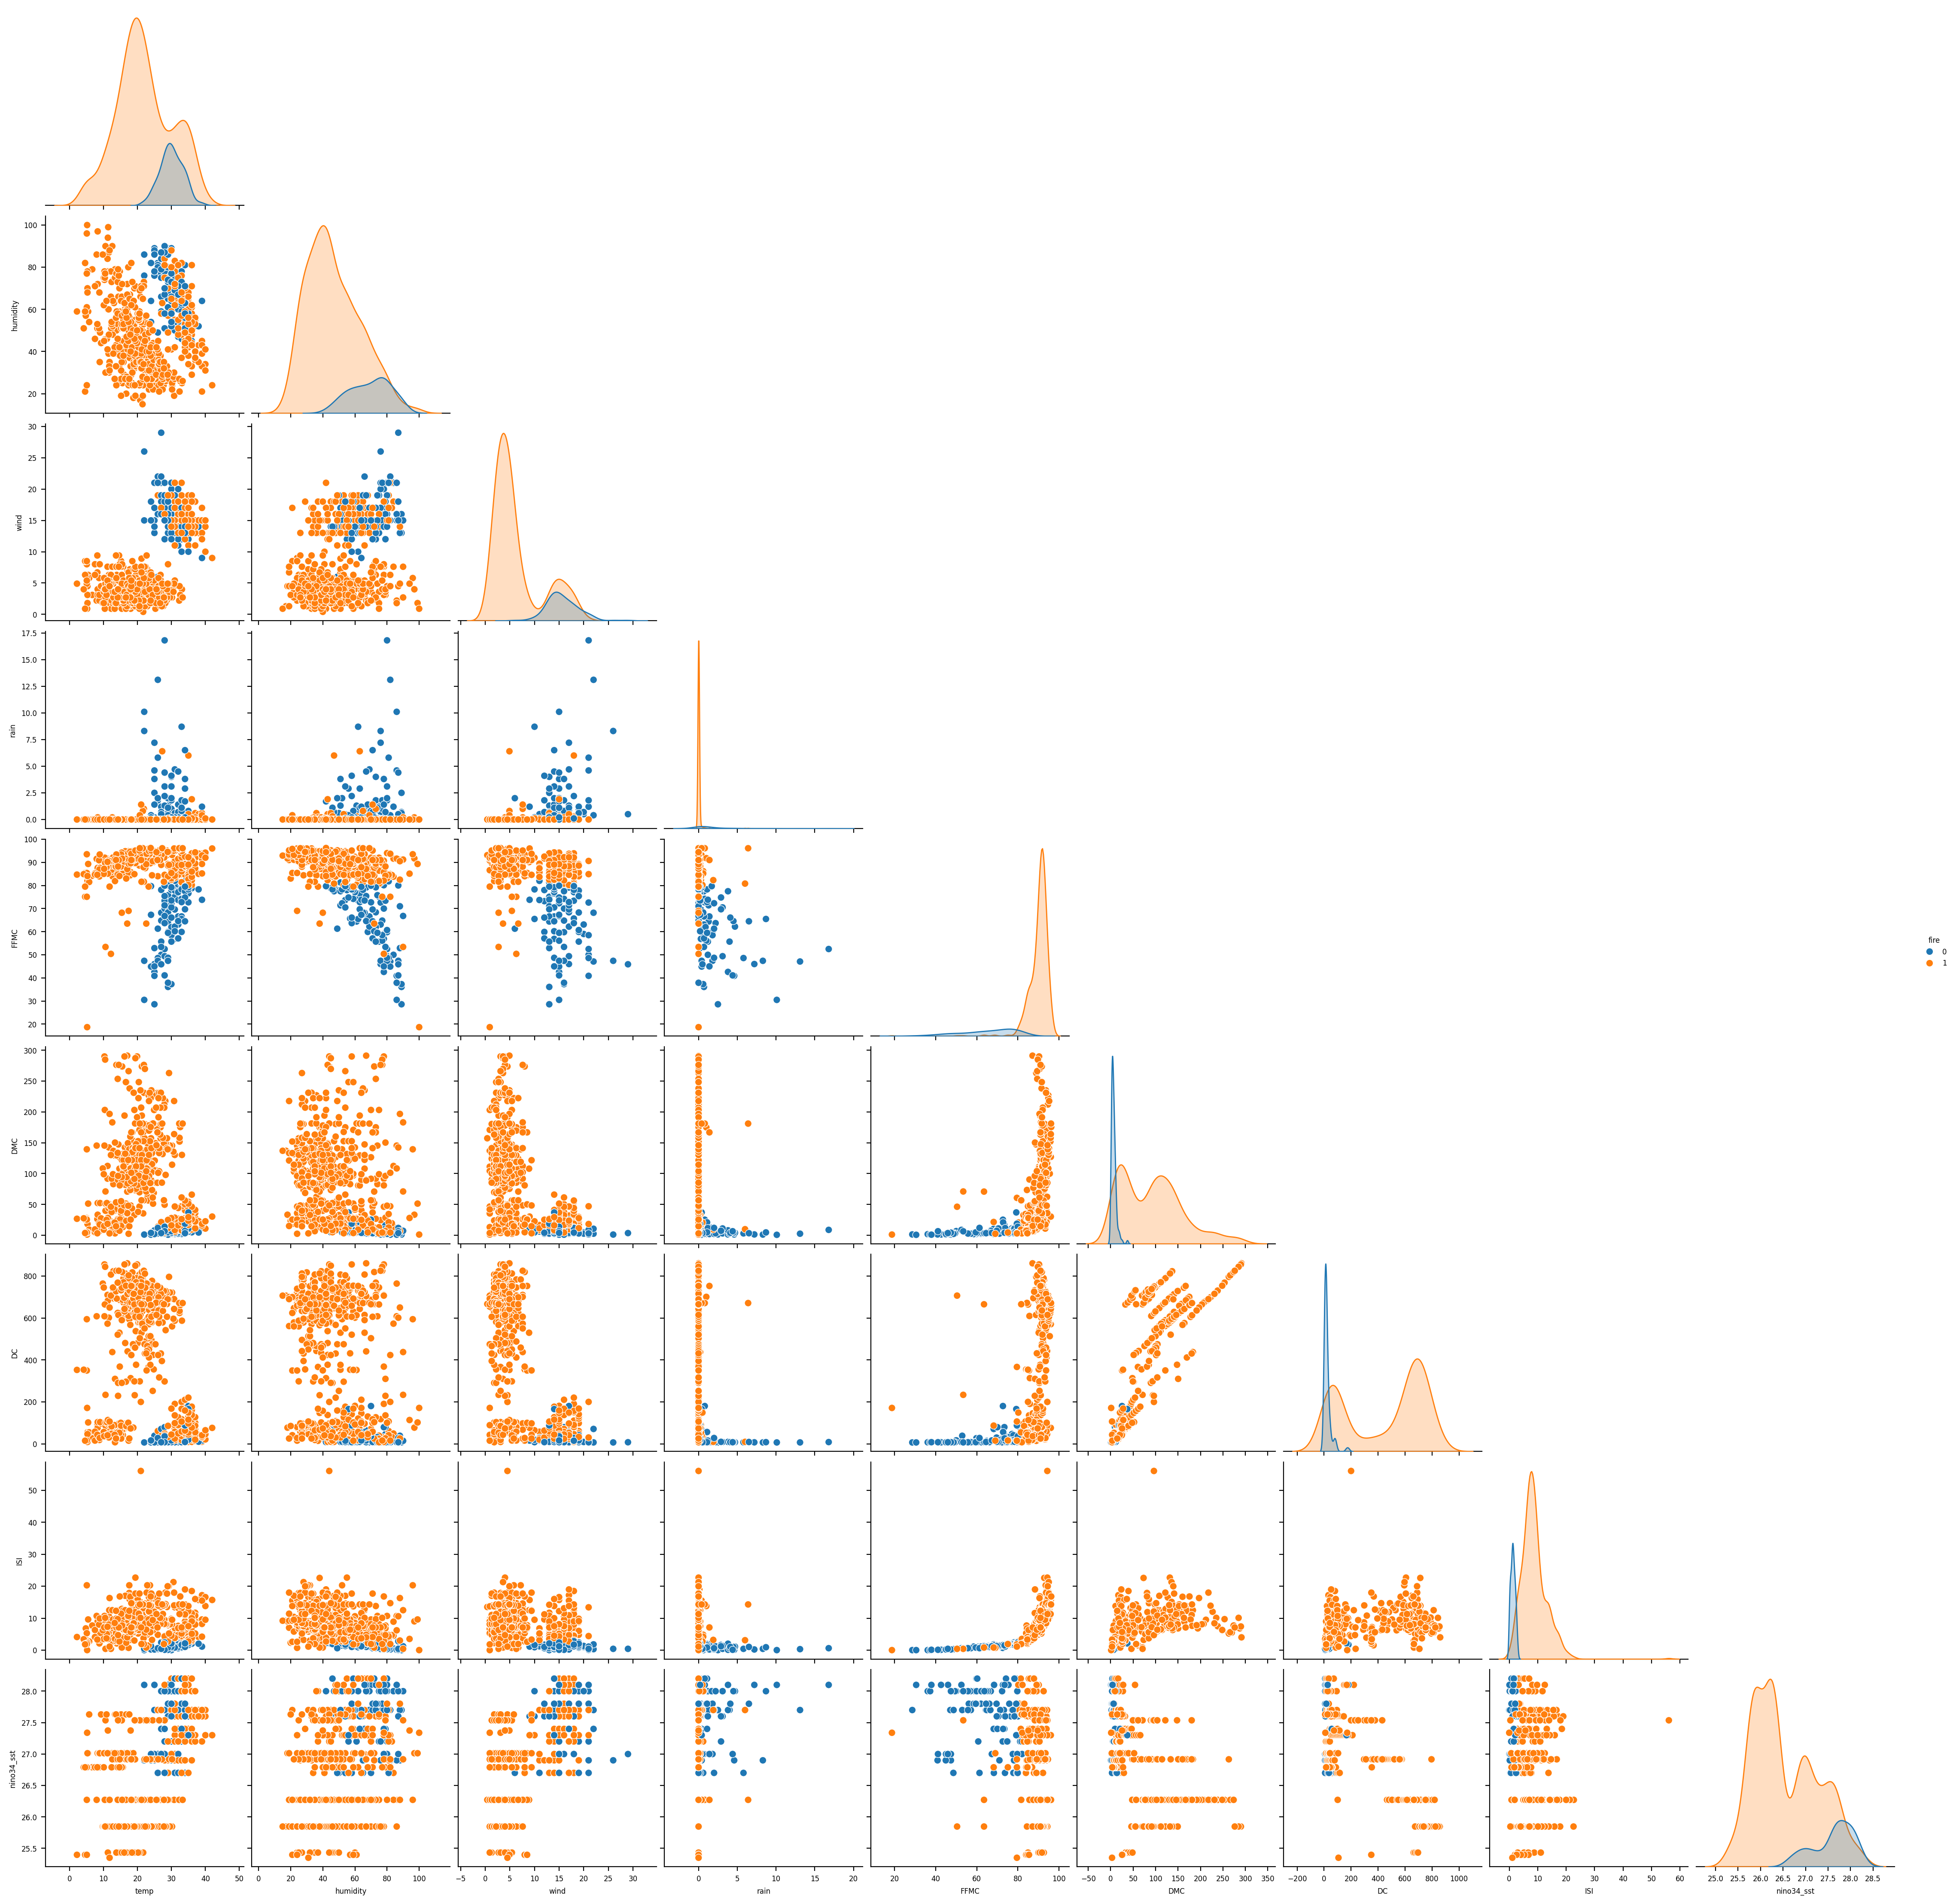

In [160]:
# Pairplot
sns.pairplot(data=df_merged, corner=True, hue='fire') # hue='fire' to color by fire
plt.show()

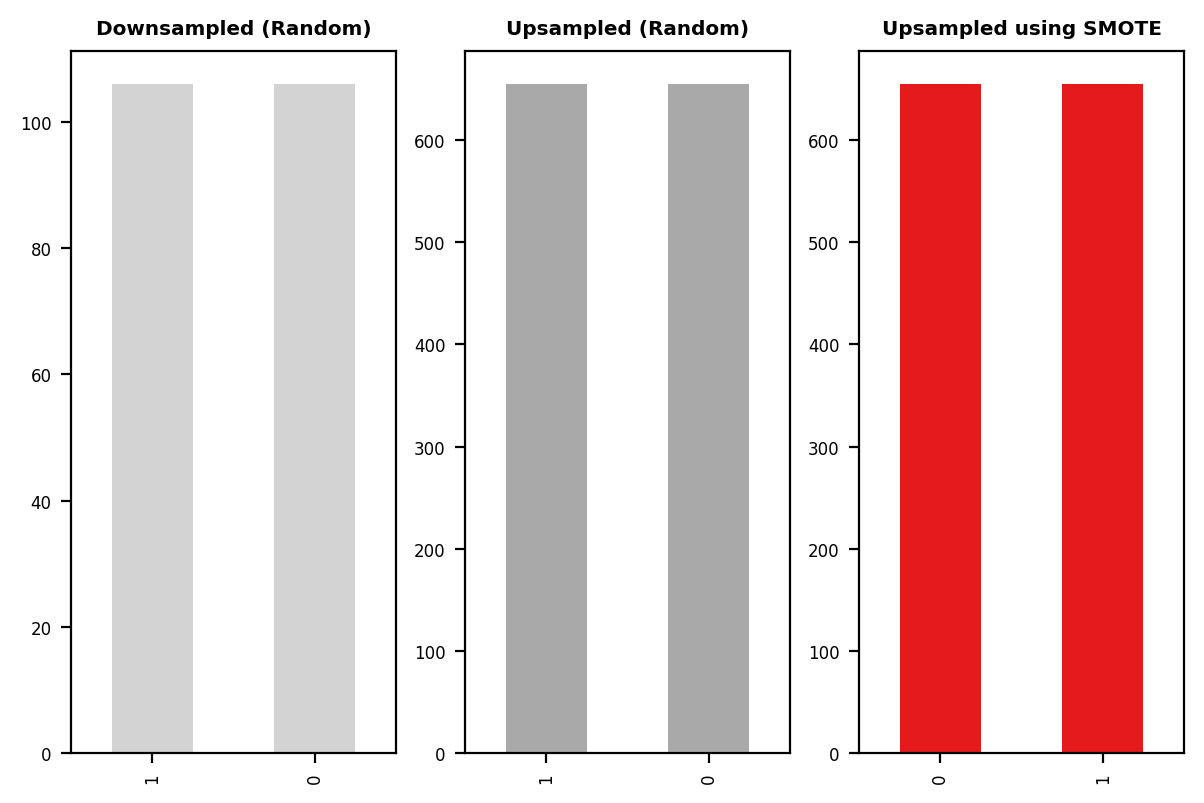

In [158]:
from sklearn.utils import resample

df_fire = df_merged[df_merged['fire'] == 1]
df_not_fire = df_merged[df_merged['fire'] == 0]

# Downsampling the 'fire' class
df_fire_downsampled = resample(df_fire, replace=False, n_samples=len(df_not_fire), random_state=42)
df_downsampled = pd.concat([df_fire_downsampled, df_not_fire])

# Upsampling the 'not fire' class
df_not_fire_upsampled = resample(df_not_fire, replace=True, n_samples=len(df_fire), random_state=42)
df_upsampled = pd.concat([df_fire, df_not_fire_upsampled])

# Upsampling the 'not fire' class using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X = df_merged.drop('fire', axis=1)
y = df_merged['fire']
X_smote, y_smote = smote.fit_resample(X, y)

df_smote = pd.concat([X_smote, y_smote], axis=1)

# Distribution of 'fire' and 'not fire' classes after resampling
plt.subplot(1, 3, 1)
df_downsampled['fire'].value_counts().plot(kind='bar', color='lightgray')
plt.title('Downsampled (Random)', fontweight='bold')

plt.subplot(1, 3, 2)
df_upsampled['fire'].value_counts().plot(kind='bar', color='darkgray')
plt.title('Upsampled (Random)', fontweight='bold')

plt.subplot(1, 3, 3)
df_smote['fire'].value_counts().plot(kind='bar', color='#e41a1c')
plt.title('Upsampled using SMOTE', fontweight='bold')

plt.tight_layout()
plt.show()

# Preprocessing and Cross-Validation

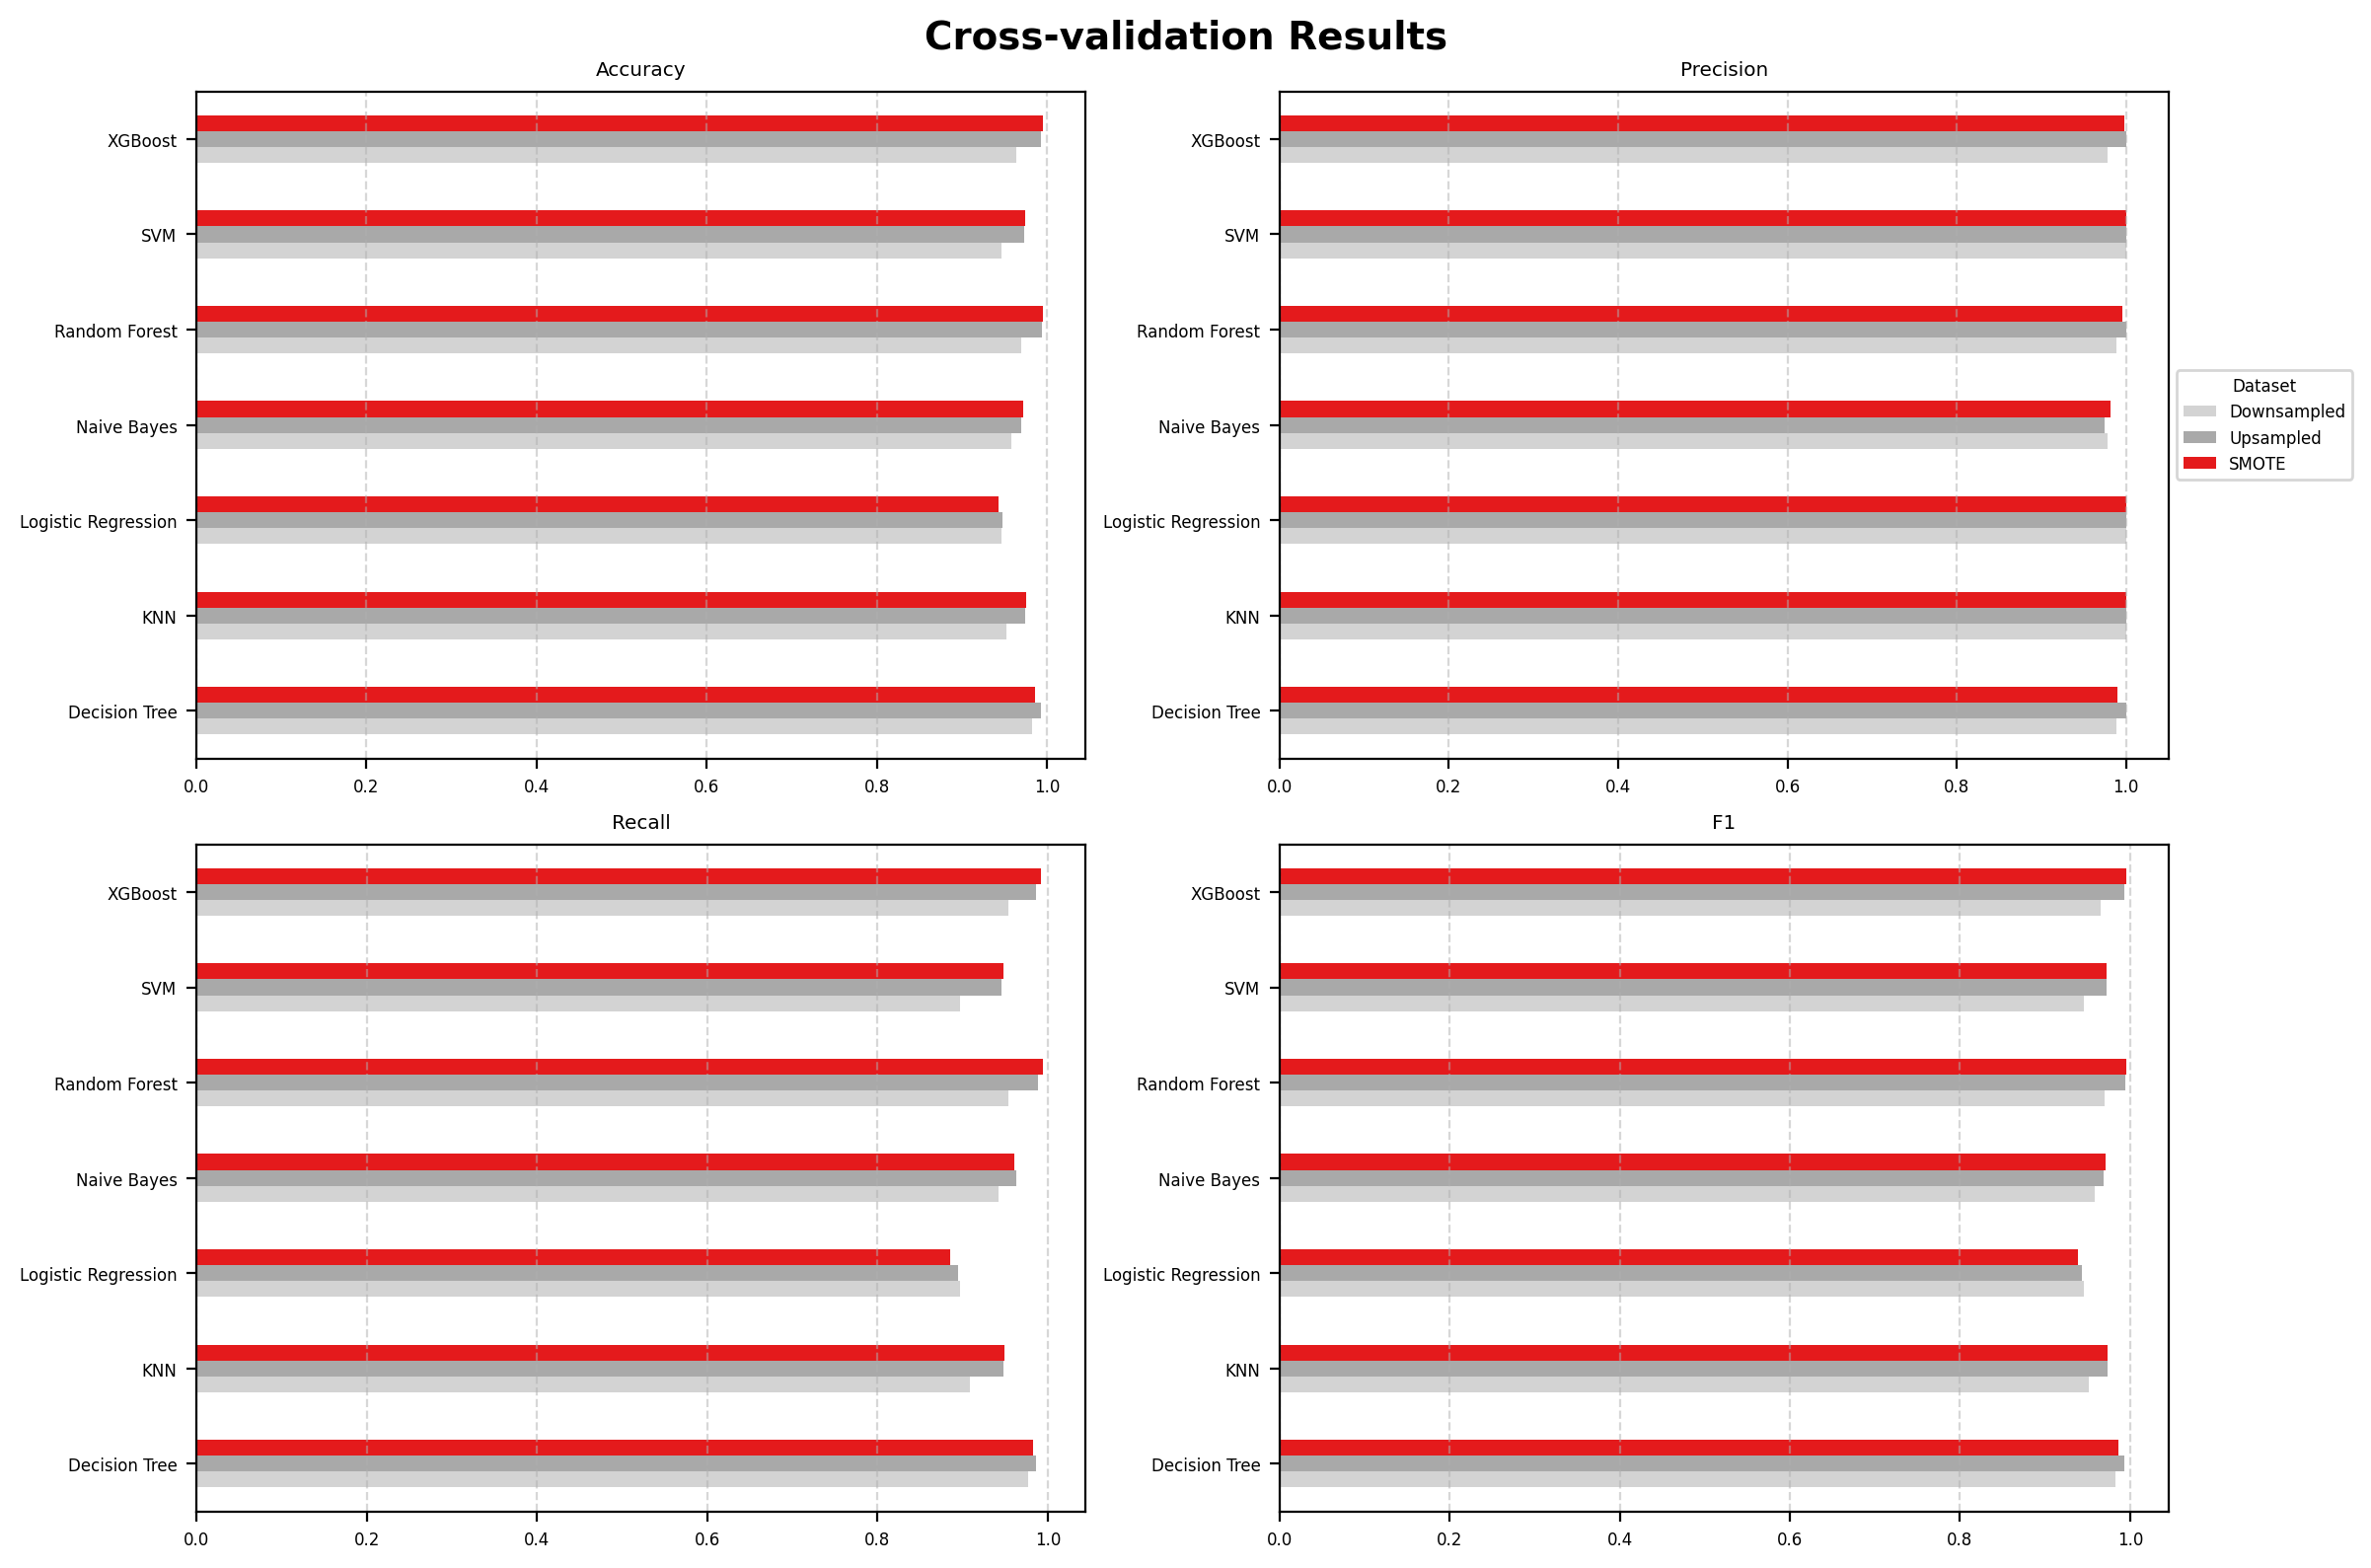

In [154]:
# A pipeline to preprocess the data and perform cross-validation among different classifiers, on all downsampled, upsampled and SMOTE datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Split the data into features and target
X_downsampled = df_downsampled.drop('fire', axis=1)
y_downsampled = df_downsampled['fire']
X_upsampled = df_upsampled.drop('fire', axis=1)
y_upsampled = df_upsampled['fire']
X_smote = df_smote.drop('fire', axis=1)
y_smote = df_smote['fire']

# Split the data into training and testing sets
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the classifiers (default hyperparameters)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', None)
])

# Perform cross-validation
cv_results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)
    scores_downsampled = cross_validate(pipeline, X_train_downsampled, y_train_downsampled, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    scores_upsampled = cross_validate(pipeline, X_train_upsampled, y_train_upsampled, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    scores_smote = cross_validate(pipeline, X_train_smote, y_train_smote, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_results[(name, 'Downsampled')] = {
            'Accuracy': scores_downsampled['test_accuracy'].mean(),
            'Precision': scores_downsampled['test_precision'].mean(),
            'Recall': scores_downsampled['test_recall'].mean(),
            'F1': scores_downsampled['test_f1'].mean()
        }
    cv_results[(name, 'Upsampled')] = {
            'Accuracy': scores_upsampled['test_accuracy'].mean(),
            'Precision': scores_upsampled['test_precision'].mean(),
            'Recall': scores_upsampled['test_recall'].mean(),
            'F1': scores_upsampled['test_f1'].mean()
        }
    cv_results[(name, 'SMOTE')] = {
            'Accuracy': scores_smote['test_accuracy'].mean(),
            'Precision': scores_smote['test_precision'].mean(),
            'Recall': scores_smote['test_recall'].mean(),
            'F1': scores_smote['test_f1'].mean()
        }

# Put the results in a DataFrame
cv_results = pd.DataFrame(cv_results).T    

# Visualize the results
plt.figure(figsize=(12, 8))

colors = {'Downsampled': 'lightgray', 'Upsampled': 'darkgray', 'SMOTE': '#e41a1c'}

plt.subplot(2, 2, 1)
cv_results['Accuracy'].unstack().reindex(columns=['Downsampled', 'Upsampled', 'SMOTE']).plot(kind='barh', ax=plt.gca(), legend=False, color=[colors[col] for col in ['Downsampled', 'Upsampled', 'SMOTE']])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
cv_results['Precision'].unstack().reindex(columns=['Downsampled', 'Upsampled', 'SMOTE']).plot(kind='barh', ax=plt.gca(), legend=False, color=[colors[col] for col in ['Downsampled', 'Upsampled', 'SMOTE']])
plt.legend(title='Dataset', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Precision')

plt.subplot(2, 2, 3)
cv_results['Recall'].unstack().reindex(columns=['Downsampled', 'Upsampled', 'SMOTE']).plot(kind='barh', ax=plt.gca(), legend=False, color=[colors[col] for col in ['Downsampled', 'Upsampled', 'SMOTE']])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Recall')

plt.subplot(2, 2, 4)
cv_results['F1'].unstack().reindex(columns=['Downsampled', 'Upsampled', 'SMOTE']).plot(kind='barh', ax=plt.gca(), legend=False, color=[colors[col] for col in ['Downsampled', 'Upsampled', 'SMOTE']])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('F1')

plt.suptitle('Cross-validation Results', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Analysis

**1. Accuracy**
* All models show high accuracy across the board, close to 100%.
* XGBoost, SVM, and Random Forest are the top performers in accuracy, regardless of how the data was balanced.
* Downsampling tends to result in slightly lower accuracy than SMOTE or upsampling because it reduces the amount of data.

**2. Precision**
* Precision is high for most models, especially XGBoost and Random Forest.
* SMOTE often gives the best precision, which means it helps models correctly identify fire days without too many false alarms.
* Models like Decision Tree and KNN have slightly lower precision, especially with downsampled data.

**3. Recall**
* Recall is crucial for detecting fire days. High recall means the model catches more actual fire days.
* SMOTE improves recall significantly for models like XGBoost, SVM, and Random Forest.
* Downsampling tends to lower recall, likely because it uses less data to identify fire days.

**4. F1-Score**
* The F1-score balances precision and recall, so it shows how well each model performs overall.
* XGBoost, SVM, and Random Forest achieve high F1-scores across all sampling methods, with SMOTE providing the best results.
* Logistic Regression and Naive Bayes perform consistently but don’t reach the same level as the more advanced models.

**Summary**
* Best Models: XGBoost, SVM, and Random Forest are the top choices, especially when combined with SMOTE.
* Sampling Method: SMOTE generally gives the best results, helping models detect fires more accurately.
* Consistency: Simpler models like Decision Tree and KNN perform reasonably well but don’t match the precision and recall of more advanced models.

**What's Next**
* Use SMOTE: Since SMOTE helps models perform better overall, it’s a good choice for balancing the dataset.
* Top Models: XGBoost, SVM, and Random Forest are recommended for further tuning and use.
* Balance Precision and Recall: Look for models with high recall and F1-scores to ensure accurate and reliable fire detection.

# Further Hyperparameters Tuning on Random Forest, SVM and XGBoost

In [23]:
# Perform hyperparameter tuning using GridSearchCV on Random Forest, XGBoost and SVM classifiers, on SMOTE dataset
# Compare the best models again using cross-validation
from sklearn.model_selection import GridSearchCV

# Define the classifiers with hyperparameters
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(probability=True)
}

# Define the hyperparameters
params = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200, 300], # Number of trees
        'classifier__max_depth': [5, 10, 20, None], # None means no limit
        'classifier__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200], # Number of trees
        'classifier__max_depth': [5, 10, 20], # Maximum depth of the tree
        'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3], # Control step size at each iteration
        'classifier__subsample': [0.5, 0.7, 1.0], # How much of the data to randomly sample for each tree
        'classifier__colsample_bytree': [0.5, 0.7, 1.0], # How much of the features to randomly sample for each tree
        'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.5] # Control regularization
    },
    'SVM': {
        'classifier__C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
        'classifier__kernel': ['linear', 'rbf', 'poly'], # Kernel type
        'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1] # Kernel coefficient
    }
}

# Evaluate default hyperparameters for later comparison
cv_results_default = {}

for name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)
    scores = cross_validate(pipeline, X_train_smote, y_train_smote, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_results_default[name] = {
            'Accuracy': scores['test_accuracy'].mean(),
            'Precision': scores['test_precision'].mean(),
            'Recall': scores['test_recall'].mean(),
            'F1': scores['test_f1'].mean()
        }
    
# Put the results in a DataFrame
cv_results_default = pd.DataFrame(cv_results_default).T
print('Default hyperparameters')
display(cv_results_default)

# Perform hyperparameter tuning
best_models = {}

for name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)
    grid_search = GridSearchCV(pipeline, param_grid=params[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)
    best_models[name] = grid_search.best_estimator_
    print(f'{name} best hyperparameters: {grid_search.best_params_}')

# Compare the best models using cross-validation
cv_results_best = {}

for name, clf in best_models.items():
    pipeline.set_params(classifier=clf)
    scores = cross_validate(pipeline, X_train_smote, y_train_smote, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_results_best[name] = {
            'Accuracy': scores['test_accuracy'].mean(),
            'Precision': scores['test_precision'].mean(),
            'Recall': scores['test_recall'].mean(),
            'F1': scores['test_f1'].mean()
        }
    
# Put the results in a DataFrame
cv_results_best = pd.DataFrame(cv_results_best).T
print('Best hyperparameters')
display(cv_results_best)

Default hyperparameters


Accuracy  Precision    Recall        F1
Random Forest  0.995229   0.996154  0.994212  0.995150
XGBoost        0.995224   0.998058  0.992252  0.995141
SVM            0.974204   1.000000  0.947647  0.972771

Random Forest best hyperparameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
XGBoost best hyperparameters: {'classifier__colsample_bytree': 0.5, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.5}
SVM best hyperparameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best hyperparameters


Accuracy  Precision    Recall        F1
Random Forest  0.995229   0.996154  0.994212  0.995150
XGBoost        0.998091   1.000000  0.996135  0.998058
SVM            0.994267   0.996190  0.992270  0.994174

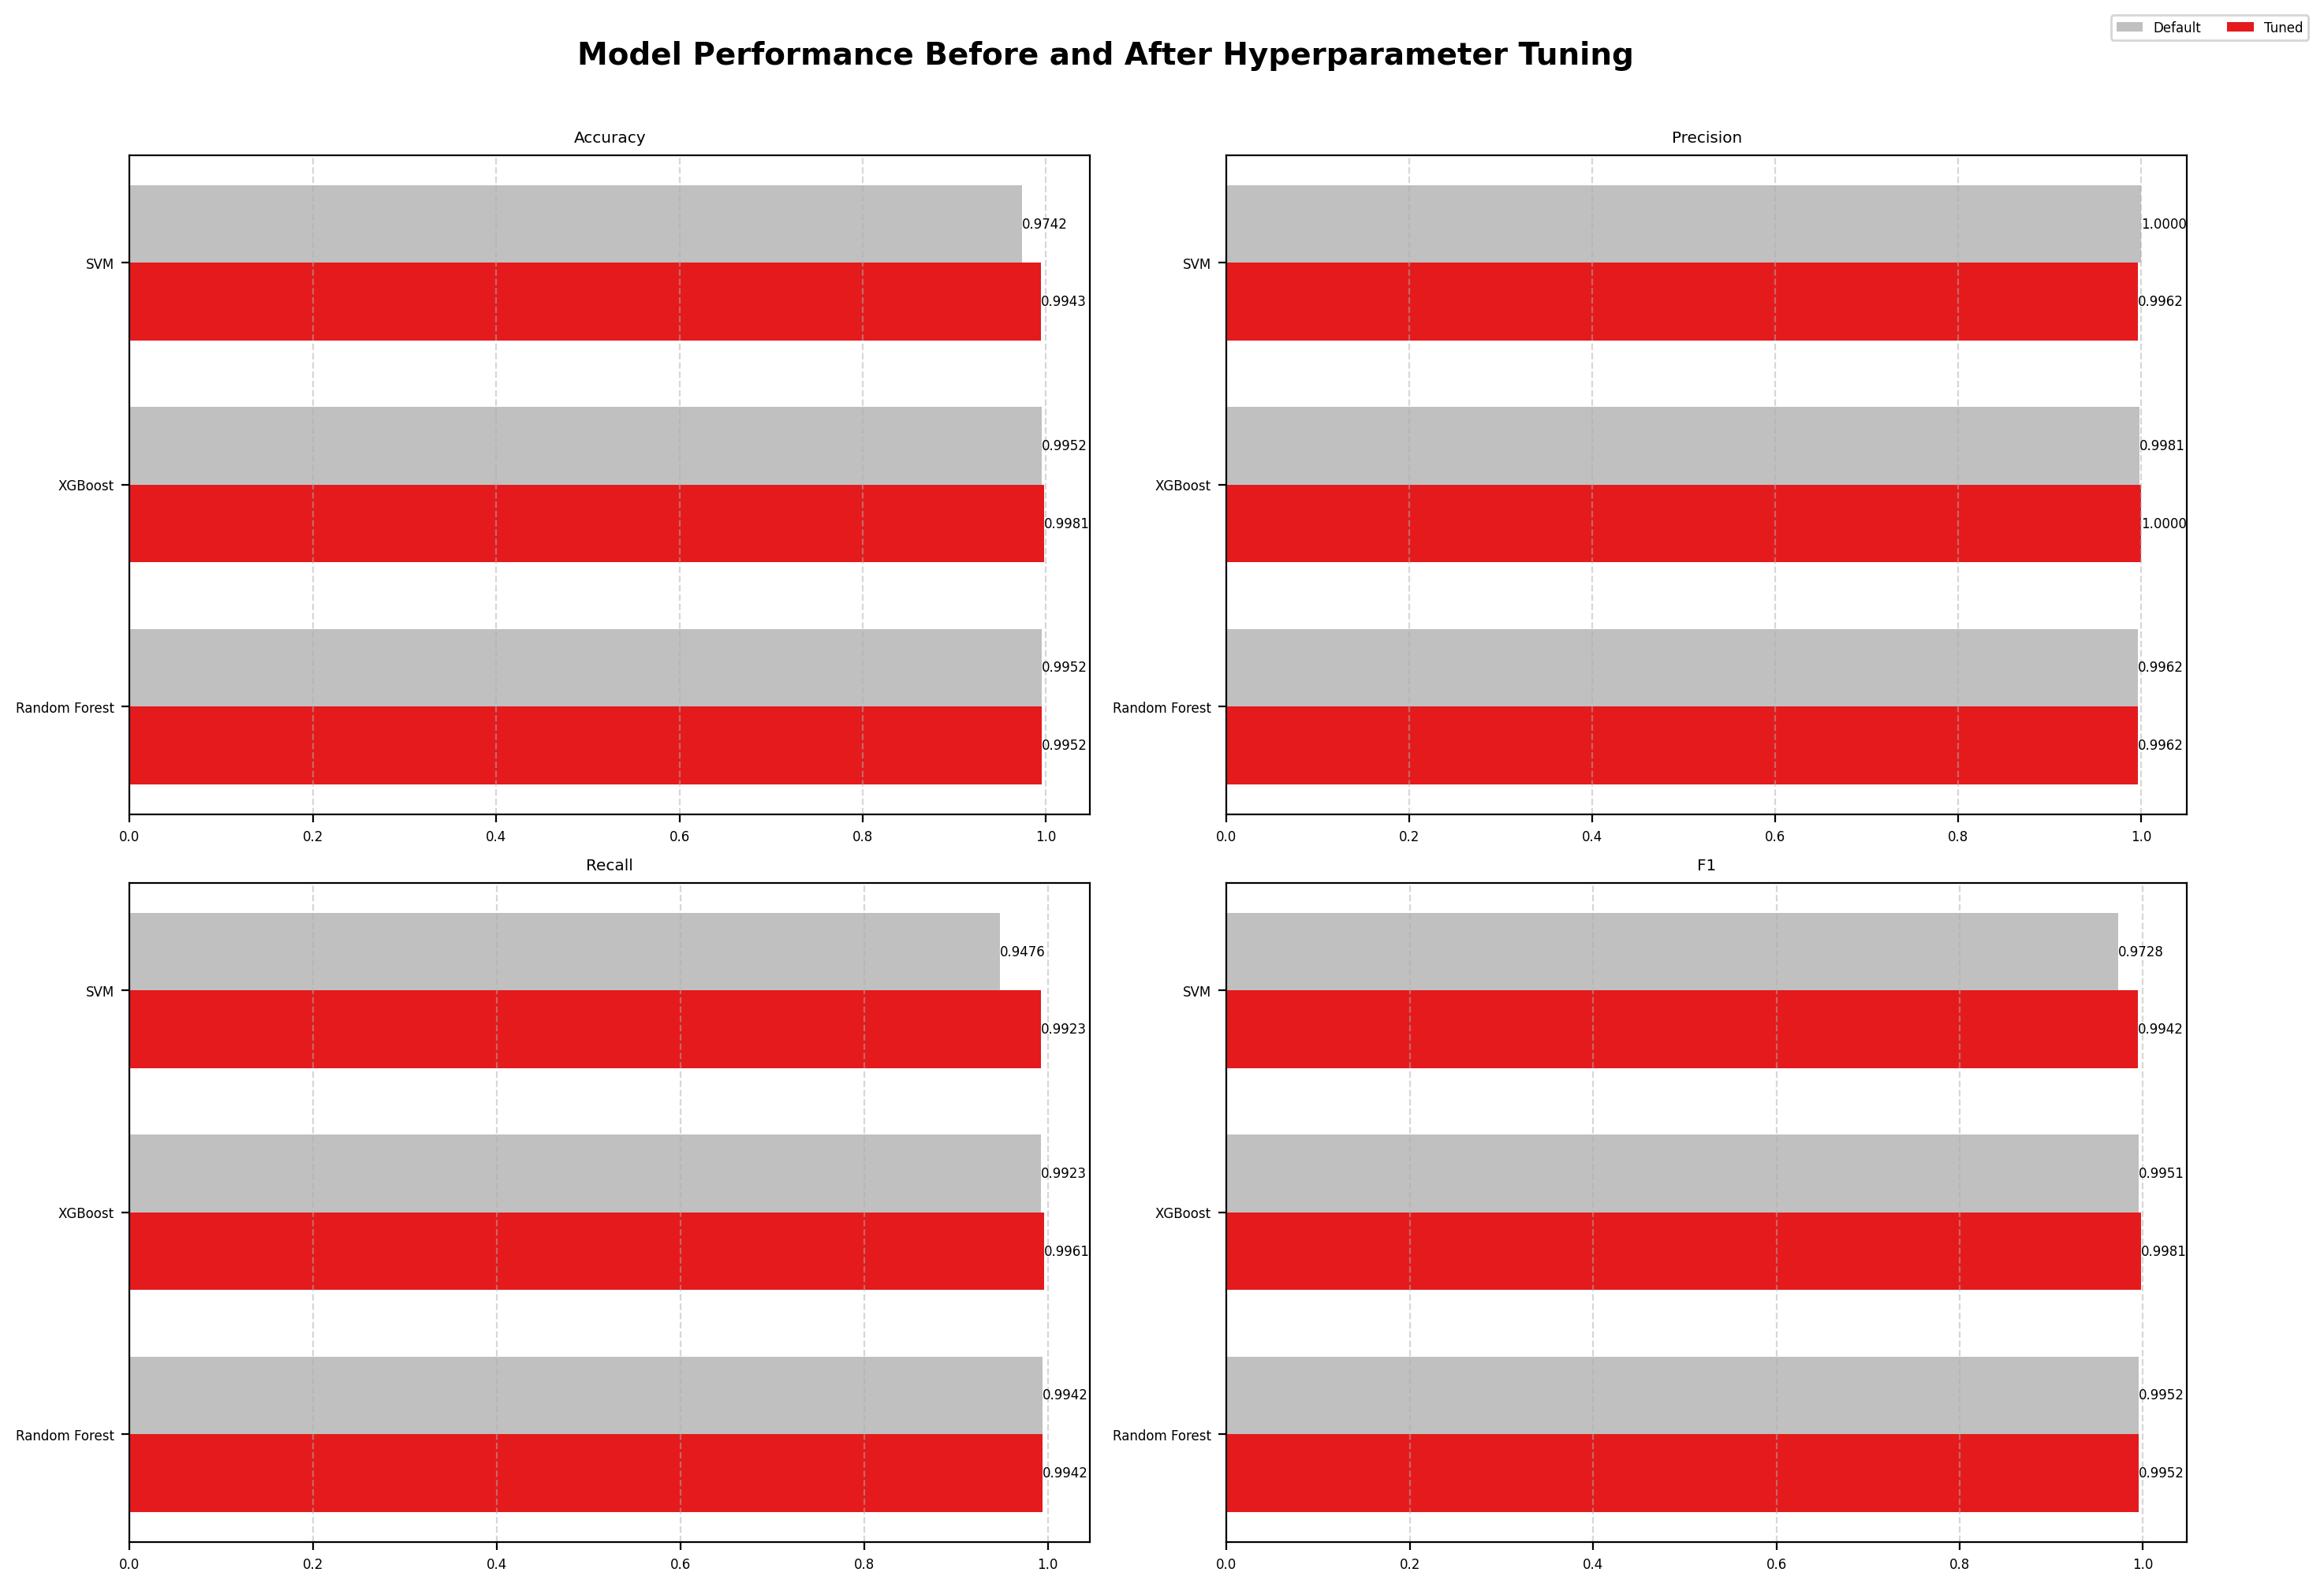

In [155]:
# Plot comparison with separate bars for default and tuned hyperparameters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    width = 0.35  # width of the bars
    x = np.arange(len(cv_results_default.index))  # the label locations
    ax.barh(x, cv_results_default[metric], width, label='Default', color='silver', alpha=1)
    ax.barh(x - width, cv_results_best[metric], width, label='Tuned', color='#e41a1c', alpha=1)
    ax.set_yticks(x - width / 2)
    ax.set_yticklabels(cv_results_default.index)
    ax.set_title(metric)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    # Annotate the bars with the values
    for j, value in enumerate(cv_results_default[metric]):
        ax.text(value, j, f'{value:.4f}', ha='left', va='center', color='black')
    for j, value in enumerate(cv_results_best[metric]):
        ax.text(value, j - width, f'{value:.4f}', ha='left', va='center', color='black')
    

fig.legend(['Default', 'Tuned'], loc='upper center', bbox_to_anchor=(1, 1), ncol=2)
fig.suptitle('Model Performance Before and After Hyperparameter Tuning', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Observations
* All three classifiers (SVM, XGBoost, Random Forest) have very high and similar performance across all metrics, suggesting they are all well-tuned.
* SVM has the highest recall after tuning, so if capturing all possible fire cases (minimizing false negatives) is critical, SVM might be the best choice.
* XGBoost and Random Forest have very close scores for precision, F1-score, and accuracy, indicating that they are reliable for both detecting and avoiding false positives.

### How to choose the best classifier?

1. We don’t want to miss any fire events
* Recall measures how well the model catches all actual fire cases, avoiding missed fires (false negatives).
* In predicting forest fires, missing a true fire event could be dangerous, allowing fires to grow out of control if not detected in time.
* By focusing on high recall, we make sure the model catches as many fire risks as possible, even if it sometimes raises false alarms.

2. False negatives are worse than false positives
* In this case, it’s usually better to have false positives (predicting a fire when there isn’t one) than to have false negatives (missing an actual fire).
* A false negative (missing a fire) could lead to huge costs and damage, while a false positive (false alarm) might just mean extra checks, which are less risky.

3. Balancing recall with precision
* While recall is very important, we don’t want recall to be high at the cost of very low precision, as that would mean too many false alarms.
* The goal is to get a good balance, but recall should come first so that the model doesn’t miss any fires.

# Choosing SVM, Why?

1. Simplicity and Interpretability
* SVM is simpler and easier to understand, especially if it's a linear SVM. It creates a clear boundary between fire and non-fire cases.
* XGBoost and Random Forest combine many decisions, which can make it harder to explain why a specific prediction was made.

2. Less Tuning Needed
* SVM generally performs well with fewer settings (hyperparameters) to adjust, making it quicker to set up.
* XGBoost and Random Forest have many settings that need fine-tuning to work well, which can take extra time and effort.

3. Efficient and Fast
* SVM can be more memory-efficient, using less computer power, especially if you have limited resources.
* XGBoost and Random Forest need more memory and processing power, especially with larger datasets.

4. Lower Risk of Overfitting
* SVM has a regularization setting (C) that controls complexity, which helps it avoid overfitting (memorizing the data too closely).
* XGBoost and Random Forest can sometimes overfit, especially if they’re not carefully tuned, meaning they might perform worse on new data.

5. Good Generalization
* SVM is known to generalize well to new data, meaning it can be stable and consistent even when used on data it hasn’t seen before.
* XGBoost and Random Forest are powerful but can sometimes be more sensitive to changes in the data.

# Evaluate the SVM Model with Test Set

Classification Report (Test Set) - SVM
              precision    recall  f1-score   support

    Not Fire       0.98      1.00      0.99       123
        Fire       1.00      0.99      0.99       139

    accuracy                           0.99       262
   macro avg       0.99      0.99      0.99       262
weighted avg       0.99      0.99      0.99       262



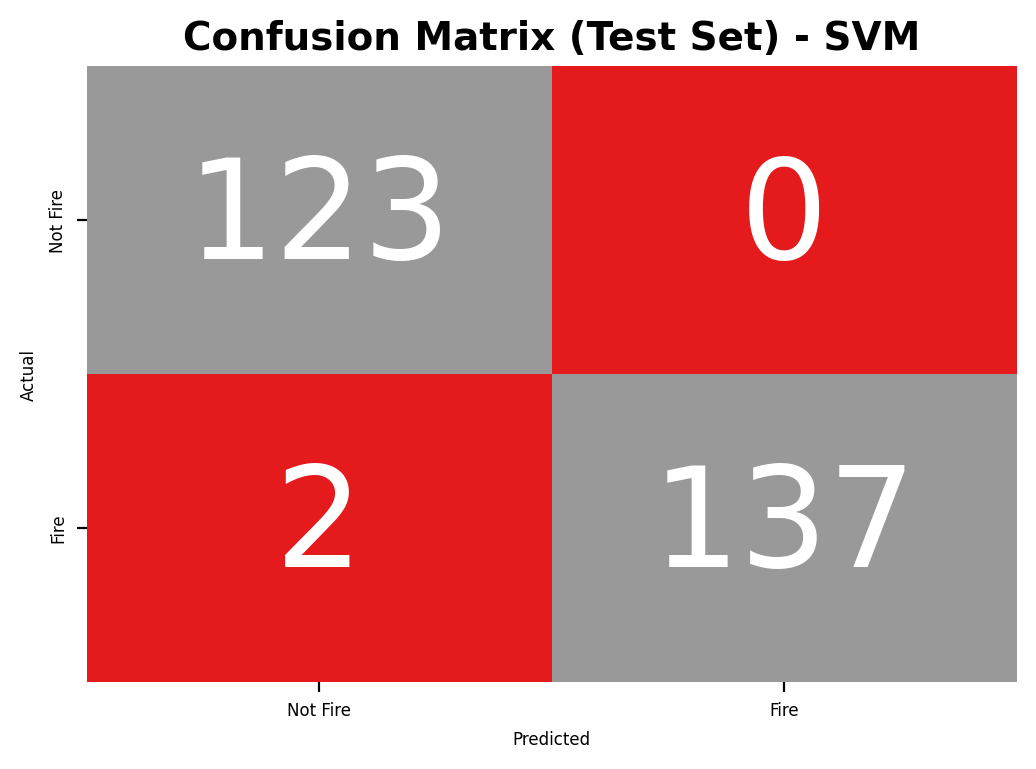

In [156]:
# Evaluate the best model on the test set

# Define the best model
best_model_svm = best_models['SVM']

# Fit the best model on the training set
best_model_svm.fit(X_train_smote, y_train_smote)

# Classification report
from sklearn.metrics import classification_report

# Predict the target values
y_pred = best_model_svm.predict(X_test_smote)

# Generate the classification report
report = classification_report(y_test_smote, y_pred, target_names=['Not Fire', 'Fire'])
print('Classification Report (Test Set) - SVM')
print(report)

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the target values
y_pred = best_model_svm.predict(X_test_smote)

# Compute the confusion matrix
cm = confusion_matrix(y_test_smote, y_pred)

# Plot the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Set1', cbar=False, xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'], linewidths=0, annot_kws={'fontsize': 50})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set) - SVM', fontweight='bold', fontsize=14)
plt.show()

## Confusion Matrix

* True Positives (Fire predicted as Fire): 137
    * The model correctly identified 137 fire events.

* True Negatives (Not Fire predicted as Not Fire): 123
    * The model correctly identified 123 non-fire events.

* False Positives (Not Fire predicted as Fire): 0
    * There were no false alarms, meaning the model didn’t incorrectly predict any non-fire cases as fires.

* False Negatives (Fire predicted as Not Fire): 2
    * The model missed 2 fire cases, predicting them as non-fire.

## Key Insights
* High Accuracy: Most predictions are correct, with only 2 out of all predictions being incorrect.
* High Precision: No false positives, meaning it’s very reliable at not raising false alarms.
* Good Recall: Only 2 fire cases were missed, so it’s catching nearly all actual fires.

## Summary

This SVM model does a great job at predicting fires accurately, with very few mistakes. It has:
* High reliability (no false positives).
* Good sensitivity (only 2 missed fires).

## ROC and AUC

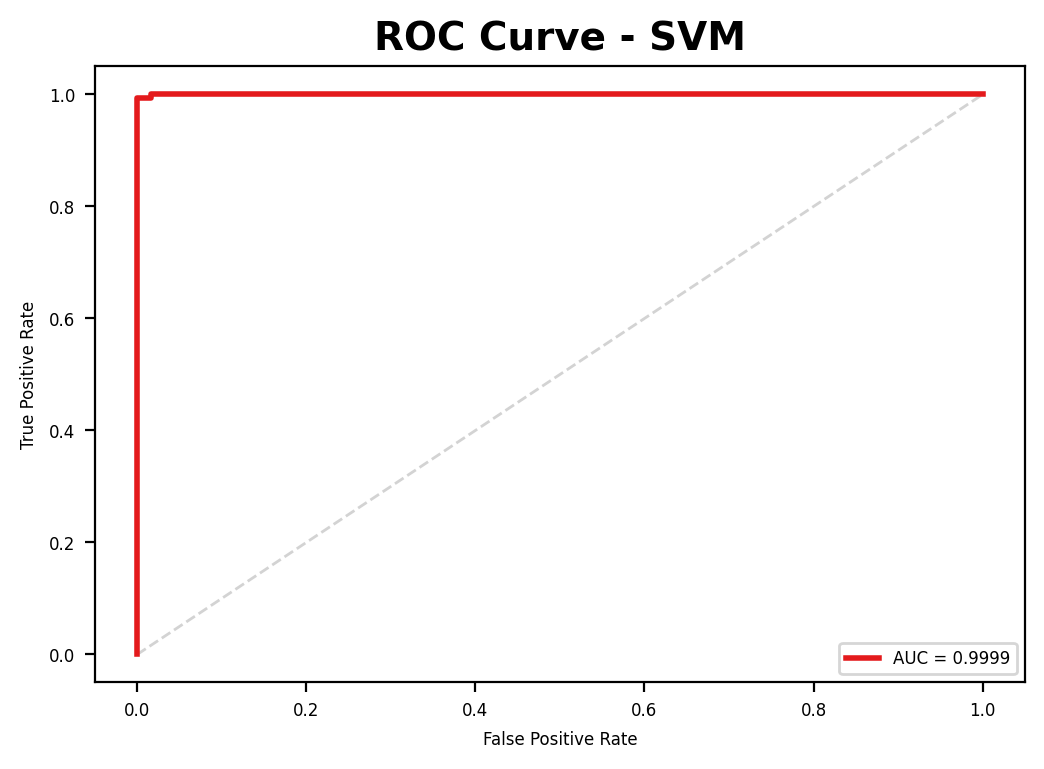

In [157]:
# ROC curve and AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the target values
y_pred = best_model_svm.predict_proba(X_test_smote)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_smote, y_pred)

# Compute the AUC score
auc = roc_auc_score(y_test_smote, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], color='lightgray', lw=1, linestyle='--')
plt.plot(fpr, tpr, color='#e41a1c', lw=2, label=f'AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.show()

### ROC Curve Analysis
* The ROC (Receiver Operating Characteristic) curve is used to evaluate the performance of the SVM classifier in distinguishing between fire and non-fire events.
* The orange line represents the model’s performance, while the dashed line represents random guessing.
* The AUC (Area Under the Curve) score is 0.9999, which is almost perfect, indicating that the SVM model has an excellent ability to distinguish between fire and non-fire events.
* A near-perfect AUC suggests that the model has a very low false positive rate while maintaining a high true positive rate. This is a desirable trait, especially in critical applications like fire prediction where false negatives (missing fire events) can be disastrous.

## Local Interpretable Model-agnostic Explanations (LIME)

In [267]:
# Find Local interpretable model-agnostic explanations (LIME) for the best model
import lime
import lime.lime_tabular

# Define the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_smote.values, 
                                                   feature_names=X_train_smote.columns, 
                                                   class_names=['Not Fire', 'Fire'], 
                                                   mode='classification',
                                                   verbose=True)

# Select a sample from the test set
sample = X_test_smote.sample(1)

# Predict the target value
y_pred = best_model_svm.predict(sample)

# Explain the prediction
explanation = explainer.explain_instance(sample.values[0], best_model_svm.predict_proba, num_features=9)

# Show the explanation
explanation.show_in_notebook()

Intercept 0.6035219920084474
Prediction_local [1.20044354]
Right: 0.9999999999994259


**Prediction Probabilities**

The leftmost box shows the prediction probabilities:
* **Not Fire**: Probability is 0.00 – the model is confident that this scenario does not represent a non-fire case.
* **Fire**: Probability is 1.00 – the model is fully confident that the conditions point towards a fire.

**Contributing Factors to Prediction**

The middle section shows how the values of various features influenced the prediction outcome.

Features contributing towards predicting "Fire" are shown on the right with orange bars indicating their impact. Features leaning towards "Not Fire" are on the left in blue:

* **FFMC** (Fine Fuel Moisture Code) between 80.22 and 91.20 contributed 0.31 towards predicting "Fire." A high value of FFMC indicates that the fine fuels are dry and can easily catch fire, significantly influencing the prediction.
* **Temperature** <= 21.30°C contributed 0.16 towards predicting "Fire." This suggests that lower temperatures under these specific conditions could still increase fire risk, likely in combination with other factors such as wind or fuel dryness.
* **DMC** (Duff Moisture Code) > 91.88 contributed 0.11 towards predicting "Fire." This indicates that a high DMC value, which represents the moisture content of decomposing materials, increases fire risk.
* **Wind** <= 4.50 km/h contributed 0.07 towards predicting "Fire." While low wind speed may seem counterintuitive for fire propagation, under specific conditions (e.g., very dry materials), even a light wind can contribute to fire occurrence.
* **ISI** (Initial Spread Index) between 2.50 and 8.00 contributed 0.02 towards predicting "Fire." A higher ISI value indicates an increased fire spread potential, but in this case, the contribution is relatively minor.

Features contributing towards "Not Fire" (blue bars):

* **DC** (Drought Code) between 40.82 and 605.80 contributed 0.03 towards predicting "Not Fire." This suggests that in this specific range of DC values, there might be conditions that indicate a lower risk of fire.
* **Rain** <= 0.00 contributed 0.02 towards predicting "Not Fire." The absence of rain typically favors fire occurrence, but here it has a slight negative contribution.
* **nino34_sst** <= 26.27 contributed 0.01 towards predicting "Not Fire." The influence of nino34 SST (a climate index related to El Niño) seems to be marginal in this instance.
* **Humidity** > 73.00% contributed 0.00 towards predicting "Not Fire." High humidity usually reduces fire risk, but its contribution here is almost negligible.

**Feature Values**

The right section of the figure lists the actual feature values for this instance:

* **FFMC**: 88.30 – This value falls in the range between 80.22 and 91.20, which contributes significantly towards the "Fire" prediction.
* Temperature: 13.40°C – This is lower than 21.30°C, which also supports the "Fire" prediction.
* **DMC**: 150.30 – A high value above 91.88 positively influences the fire prediction.
* **Wind**: 3.60 km/h – This value falls within the range that influences the prediction towards "Fire."
* **DC**: 309.90 – This value is within the range contributing towards "Not Fire," indicating that there are mixed effects at this level.
* **ISI**: 6.80 – This value falls within the range that adds a minor contribution towards "Fire."
* **Rain**: 0.00 mm – No rain adds a slight negative impact towards predicting "Not Fire."
* **nino34_sst**: 26.92 – The influence of this feature is negligible in this particular prediction.
* **Humidity**: 79% – The impact of humidity is very small, but higher values generally reduce fire risk.

**Summary**

* The model predicted Fire with full confidence (probability = 1.00).
* **FFMC**, **temperature**, **DMC**, **wind**, and **ISI** are the main factors contributing to the prediction. High **FFMC** and **DMC** values indicate dry fuels, and even with relatively low **wind speed** and **temperature**, the conditions were still deemed suitable for a fire.
* **DC**, **rain**, **nino34_sst**, and **humidity** are slightly reducing the likelihood of fire in this instance, but their effects are not sufficient to override the contributions towards "**Fire**."
* The prediction highlights that fuel moisture codes (**FFMC**, **DMC**) and **wind** play important roles, while factors like **rain** and **DC** have mixed impacts that depend on their specific values.

# Save the Model

In [28]:
# Save the best model as pkl
import joblib

joblib.dump(best_model_svm, 'best_model.pkl')

['best_model.pkl']

# Load and Test the Model

In [29]:
import joblib

loaded_model = joblib.load('best_model.pkl')

In [277]:
# Pick 10 samples from X_test and predict the output
sample_input = X_test_smote.sample(5)
print('Sample Input')
display(sample_input)

sample_output = y_test_smote.loc[sample_input.index]
sample_prediction = loaded_model.predict(sample_input)
sample_prediction_proba = loaded_model.predict_proba(sample_input)[:, 1]

# Display the results
results = pd.DataFrame({
    'Actual': sample_output,
    'Predicted': sample_prediction,
    'Fire Probability': sample_prediction_proba * 100  # Convert to percentage
})
results['Fire Probability'] = results['Fire Probability'].map(lambda x: f'{x:.2f}%')
print('Sample Prediction')
display(results)

Sample Input


temp  humidity       wind      rain       FFMC         DMC  \
503   23.700000        40   1.800000  0.000000  91.800000  170.900000   
651   14.200000        46   4.000000  0.000000  84.700000    8.200000   
23    32.000000        66  17.000000  0.000000  85.900000   11.200000   
808   33.519709        63  13.240146  3.284233  68.475257    6.527592   
1286  33.417767        66  13.000000  1.619087  67.895077    6.501320   

              DC        ISI  nino34_sst  
503   692.300000  13.700000   26.270968  
651    55.000000   2.900000   26.789286  
23     55.800000   5.600000   28.200000  
808     9.415767   1.151971   27.696058  
1286    9.508883   1.141777   27.658223

Sample Prediction


Actual  Predicted Fire Probability
503        1          1          100.00%
651        1          1          100.00%
23         1          1           99.50%
808        0          0            0.01%
1286       0          0            0.00%